# Decision Trees and Random Forests in Python

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("kyphosis.csv")

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

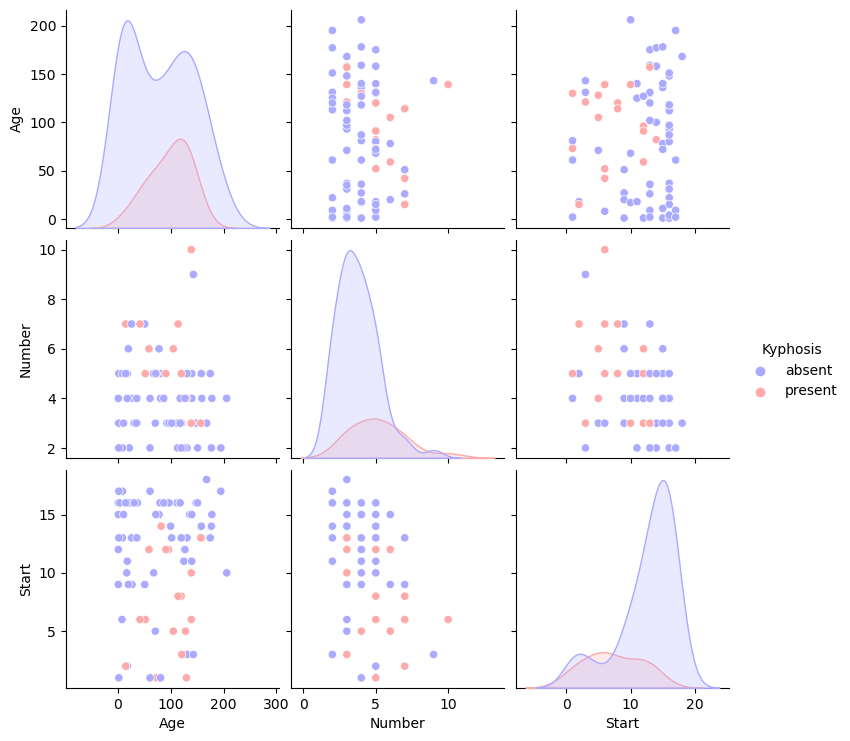

In [4]:
sns.pairplot(data, hue="Kyphosis", palette="bwr")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.drop("Kyphosis", axis=1)
y = data.loc[:, "Kyphosis"]

In [9]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Trees

We'll start just by training a single decision tree.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print("Confusion Matrix Decision Tree: \n")
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

Confusion Matrix Decision Tree: 

[[15  4]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.83      0.79      0.81        19
     present       0.43      0.50      0.46         6

    accuracy                           0.72        25
   macro avg       0.63      0.64      0.64        25
weighted avg       0.74      0.72      0.73        25



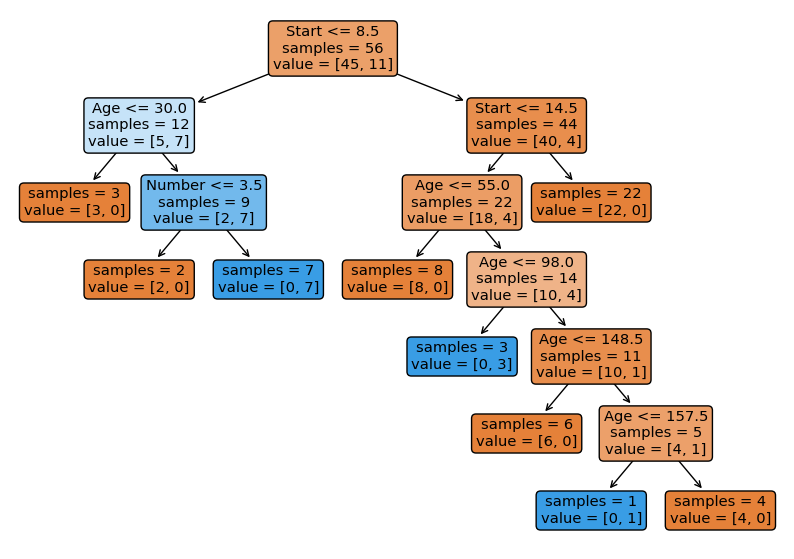

In [18]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10,7))
plot_tree(
    decision_tree=dtree,
    max_depth = None,
    feature_names = X.columns,
    filled=True,
    impurity=False,
    rounded=True,
    precision=1
)

plt.show()